In [1]:
import sys
sys.path.append('../..')
import torchvision 
from torchvision import transforms
from torch.utils.data import DataLoader
import torch as ch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import cox
from cox.utils import Parameters
import cox.store as store
from cox.readers import CollectionReader
import seaborn as sns
import pickle
import os

from delphi import train
from delphi.cifar_models import vgg11
from delphi.utils import model_utils
from delphi.utils.datasets import CIFAR
import delphi.utils.constants as consts
import delphi.utils.data_augmentation as da
from delphi.utils.helpers import setup_store_with_metadata

# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

# Constants

In [2]:
BASE_CLASSIFIER_PATH = '/home/gridsan/stefanou/VGG-11-CIFAR-10/'

TRUNCATED_STORE_PATH = '/home/gridsan/stefanou/VGG-11-CIFAR-10/Truncated/'
STANDARD_STORE_PATH = '/home/gridsan/stefanou/VGG-11-CIFAR-10/Standard/'

TRUNCATED_EVAL_STORE_PATH = '/home/gridsan/stefanou/VGG-11-CIFAR-10/TruncatedTest/'
STANDARD_EVAL_STORE_PATH = '/home/gridsan/stefanou/VGG-11-CIFAR-10/StandardTest/'

# Experiment Hyperparameters

In [3]:
args = Parameters({ 
    'epochs': 150,
    'num_workers': 8, 
    'batch_size': 128, 
    'lr': 1e-1, 
    'momentum': .9, 
    'weight_decay': 5e-4, 
    'save_ckpt_iters': 50,
    'should_save_ckpt': True,
    'log_iters': 1,
    'custom_lr_multiplier': consts.COSINE, 
    'validation_split': .8,
    'shuffle': True,
})
if ch.cuda.is_available(): 
    args.__setattr__('device', 'cuda')
args

{
  "epochs": 150,
  "num_workers": 8,
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "weight_decay": 0.0005,
  "save_ckpt_iters": 50,
  "should_save_ckpt": true,
  "log_iters": 1,
  "custom_lr_multiplier": "cosine",
  "validation_split": 0.8,
  "shuffle": true,
  "device": "cuda"
}

# Setup and Explore Dataset

In [4]:
ds = CIFAR(data_path='/home/gridsan/stefanou/')
model, _ = model_utils.make_and_restore_model(arch='vgg11', dataset=ds)
train_loader, val_loader = ds.make_loaders(batch_size=128, workers=8)

==> Preparing dataset cifar..
train path: /home/gridsan/stefanou/
Files already downloaded and verified
Files already downloaded and verified


label: automobile


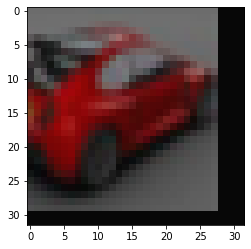

label: horse


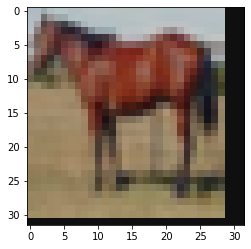

label: truck


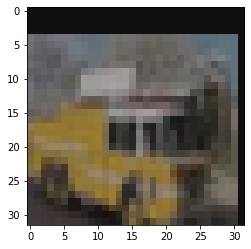

label: deer


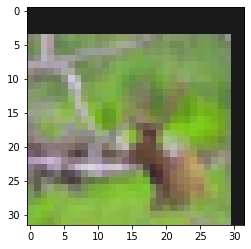

label: ship


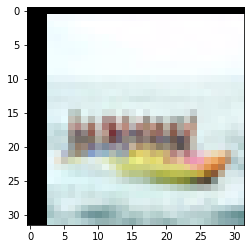

label: bird


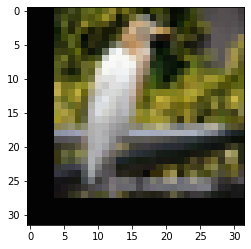

label: cat


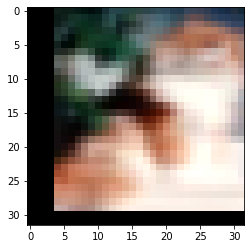

label: airplane


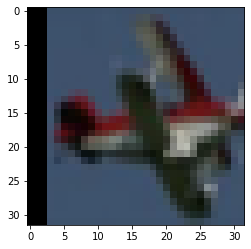

label: dog


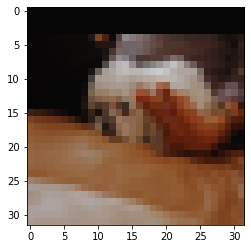

label: frog


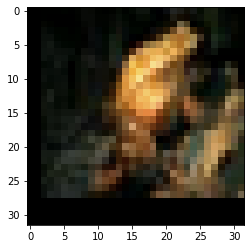

In [5]:
labels = {i for i in range(10)}
for image, target in train_loader: 
    for j in range(len(target)): 
        im, targ = image[j], target[j]
        if targ.item() in labels: 
            print("label: {}".format(da.CIFAR_LABELS[targ.item()]))
            plt.imshow(transforms.ToPILImage(mode="RGB")(im.squeeze(0)))
            plt.show()
            labels.remove(targ.item())
        if len(labels) == 0: 
            break

# Setup Store and Train Model

In [6]:
# logging store
out_store = store.Store(BASE_CLASSIFIER_PATH)
setup_store_with_metadata(args, out_store)

Logging in: /home/gridsan/stefanou/VGG-11-CIFAR-10/65173d32-f71f-4bc0-ab73-d632ff2ed808


In [7]:
# train
final_model = train.train_model(args, model, (train_loader, val_loader), store=out_store, device=args.device)

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

In [8]:
reader = CollectionReader(BASE_CLASSIFIER_PATH)
metadata = reader.df('metadata')
logs = reader.df('logs')
reader.close()
logs.head()

100%|██████████| 1/1 [00:00<00:00, 77.11it/s]


,epoch,val_prec1,val_loss,train_prec1,train_loss,time,exp_id
0,1,20.709999,2.059171,14.296000,2.590769,5.855427,65173d32-f71f-4bc0-ab73-d632ff2ed808
1,2,33.430000,1.741164,25.414000,1.887015,13.039005,65173d32-f71f-4bc0-ab73-d632ff2ed808
2,3,45.039997,1.450751,39.076000,1.603730,20.271984,65173d32-f71f-4bc0-ab73-d632ff2ed808
3,4,59.389999,1.133357,51.153999,1.322710,26.886975,65173d32-f71f-4bc0-ab73-d632ff2ed808
4,5,65.119995,0.990353,60.505997,1.101948,33.506555,65173d32-f71f-4bc0-ab73-d632ff2ed808


# Accuracy and Loss Curves

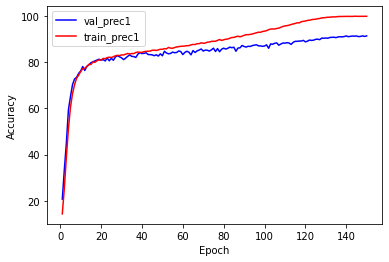

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

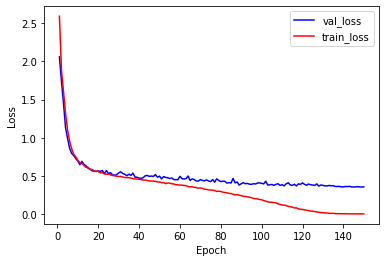

In [9]:
sns.lineplot(data=logs, x='epoch', y='val_prec1', label='val_prec1', color='b')
ax = sns.lineplot(data=logs, x='epoch', y='train_prec1', label='train_prec1', color='r')
ax.set(xlabel='Epoch', ylabel='Accuracy')
plt.show()

sns.lineplot(data=logs, x='epoch', y='val_loss', label='val_loss', color='b')
ax = sns.lineplot(data=logs, x='epoch', y='train_loss', label='train_loss', color='r')
ax.set(xlabel='Epoch', ylabel='Loss')

# Load in Model

In [13]:
final_model

AttackerModel(
  (normalizer): InputNormalize()
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, aff

In [11]:
model_utils.make_and_restore_model(arch='vgg11', dataset=ds, resume_path=BASE_CLASSIFIER_PATH + '65173d32-f71f-4bc0-ab73-d632ff2ed808/checkpoint.pt.best')

=> loading checkpoint '/home/gridsan/stefanou/VGG-11-CIFAR-10/65173d32-f71f-4bc0-ab73-d632ff2ed808/checkpoint.pt.best'


RuntimeError: Error(s) in loading state_dict for AttackerModel:
	Missing key(s) in state_dict: "normalizer.new_mean", "normalizer.new_std", "model.features.0.weight", "model.features.0.bias", "model.features.1.weight", "model.features.1.bias", "model.features.1.running_mean", "model.features.1.running_var", "model.features.4.weight", "model.features.4.bias", "model.features.5.weight", "model.features.5.bias", "model.features.5.running_mean", "model.features.5.running_var", "model.features.8.weight", "model.features.8.bias", "model.features.9.weight", "model.features.9.bias", "model.features.9.running_mean", "model.features.9.running_var", "model.features.11.weight", "model.features.11.bias", "model.features.12.weight", "model.features.12.bias", "model.features.12.running_mean", "model.features.12.running_var", "model.features.15.weight", "model.features.15.bias", "model.features.16.weight", "model.features.16.bias", "model.features.16.running_mean", "model.features.16.running_var", "model.features.18.weight", "model.features.18.bias", "model.features.19.weight", "model.features.19.bias", "model.features.19.running_mean", "model.features.19.running_var", "model.features.22.weight", "model.features.22.bias", "model.features.23.weight", "model.features.23.bias", "model.features.23.running_mean", "model.features.23.running_var", "model.features.25.weight", "model.features.25.bias", "model.features.26.weight", "model.features.26.bias", "model.features.26.running_mean", "model.features.26.running_var", "model.classifier.weight", "model.classifier.bias", "attacker.normalize.new_mean", "attacker.normalize.new_std", "attacker.model.features.0.weight", "attacker.model.features.0.bias", "attacker.model.features.1.weight", "attacker.model.features.1.bias", "attacker.model.features.1.running_mean", "attacker.model.features.1.running_var", "attacker.model.features.4.weight", "attacker.model.features.4.bias", "attacker.model.features.5.weight", "attacker.model.features.5.bias", "attacker.model.features.5.running_mean", "attacker.model.features.5.running_var", "attacker.model.features.8.weight", "attacker.model.features.8.bias", "attacker.model.features.9.weight", "attacker.model.features.9.bias", "attacker.model.features.9.running_mean", "attacker.model.features.9.running_var", "attacker.model.features.11.weight", "attacker.model.features.11.bias", "attacker.model.features.12.weight", "attacker.model.features.12.bias", "attacker.model.features.12.running_mean", "attacker.model.features.12.running_var", "attacker.model.features.15.weight", "attacker.model.features.15.bias", "attacker.model.features.16.weight", "attacker.model.features.16.bias", "attacker.model.features.16.running_mean", "attacker.model.features.16.running_var", "attacker.model.features.18.weight", "attacker.model.features.18.bias", "attacker.model.features.19.weight", "attacker.model.features.19.bias", "attacker.model.features.19.running_mean", "attacker.model.features.19.running_var", "attacker.model.features.22.weight", "attacker.model.features.22.bias", "attacker.model.features.23.weight", "attacker.model.features.23.bias", "attacker.model.features.23.running_mean", "attacker.model.features.23.running_var", "attacker.model.features.25.weight", "attacker.model.features.25.bias", "attacker.model.features.26.weight", "attacker.model.features.26.bias", "attacker.model.features.26.running_mean", "attacker.model.features.26.running_var", "attacker.model.classifier.weight", "attacker.model.classifier.bias". 
	Unexpected key(s) in state_dict: "zer.new_mean", "zer.new_std", "eatures.0.weight", "eatures.0.bias", "eatures.1.weight", "eatures.1.bias", "eatures.1.running_mean", "eatures.1.running_var", "eatures.1.num_batches_tracked", "eatures.4.weight", "eatures.4.bias", "eatures.5.weight", "eatures.5.bias", "eatures.5.running_mean", "eatures.5.running_var", "eatures.5.num_batches_tracked", "eatures.8.weight", "eatures.8.bias", "eatures.9.weight", "eatures.9.bias", "eatures.9.running_mean", "eatures.9.running_var", "eatures.9.num_batches_tracked", "eatures.11.weight", "eatures.11.bias", "eatures.12.weight", "eatures.12.bias", "eatures.12.running_mean", "eatures.12.running_var", "eatures.12.num_batches_tracked", "eatures.15.weight", "eatures.15.bias", "eatures.16.weight", "eatures.16.bias", "eatures.16.running_mean", "eatures.16.running_var", "eatures.16.num_batches_tracked", "eatures.18.weight", "eatures.18.bias", "eatures.19.weight", "eatures.19.bias", "eatures.19.running_mean", "eatures.19.running_var", "eatures.19.num_batches_tracked", "eatures.22.weight", "eatures.22.bias", "eatures.23.weight", "eatures.23.bias", "eatures.23.running_mean", "eatures.23.running_var", "eatures.23.num_batches_tracked", "eatures.25.weight", "eatures.25.bias", "eatures.26.weight", "eatures.26.bias", "eatures.26.running_mean", "eatures.26.running_var", "eatures.26.num_batches_tracked", "lassifier.weight", "lassifier.bias", "r.normalize.new_mean", "r.normalize.new_std", "r.model.features.0.weight", "r.model.features.0.bias", "r.model.features.1.weight", "r.model.features.1.bias", "r.model.features.1.running_mean", "r.model.features.1.running_var", "r.model.features.1.num_batches_tracked", "r.model.features.4.weight", "r.model.features.4.bias", "r.model.features.5.weight", "r.model.features.5.bias", "r.model.features.5.running_mean", "r.model.features.5.running_var", "r.model.features.5.num_batches_tracked", "r.model.features.8.weight", "r.model.features.8.bias", "r.model.features.9.weight", "r.model.features.9.bias", "r.model.features.9.running_mean", "r.model.features.9.running_var", "r.model.features.9.num_batches_tracked", "r.model.features.11.weight", "r.model.features.11.bias", "r.model.features.12.weight", "r.model.features.12.bias", "r.model.features.12.running_mean", "r.model.features.12.running_var", "r.model.features.12.num_batches_tracked", "r.model.features.15.weight", "r.model.features.15.bias", "r.model.features.16.weight", "r.model.features.16.bias", "r.model.features.16.running_mean", "r.model.features.16.running_var", "r.model.features.16.num_batches_tracked", "r.model.features.18.weight", "r.model.features.18.bias", "r.model.features.19.weight", "r.model.features.19.bias", "r.model.features.19.running_mean", "r.model.features.19.running_var", "r.model.features.19.num_batches_tracked", "r.model.features.22.weight", "r.model.features.22.bias", "r.model.features.23.weight", "r.model.features.23.bias", "r.model.features.23.running_mean", "r.model.features.23.running_var", "r.model.features.23.num_batches_tracked", "r.model.features.25.weight", "r.model.features.25.bias", "r.model.features.26.weight", "r.model.features.26.bias", "r.model.features.26.running_mean", "r.model.features.26.running_var", "r.model.features.26.num_batches_tracked", "r.model.classifier.weight", "r.model.classifier.bias". 

# Test Accuracy

In [12]:
test_store = store.Store(args.out_dir)
results = train.eval_model(args, base_model, test_loader, test_store)
results

TypeError: expected str, bytes or os.PathLike object, not NoneType